In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets//dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1>DATA PREPARETION</h1>

In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue["Month"] = dengue ["Month"].astype("category")
dengue["Region"] = dengue ["Region"].astype("category")

<h1>BAR PLOT </h1>

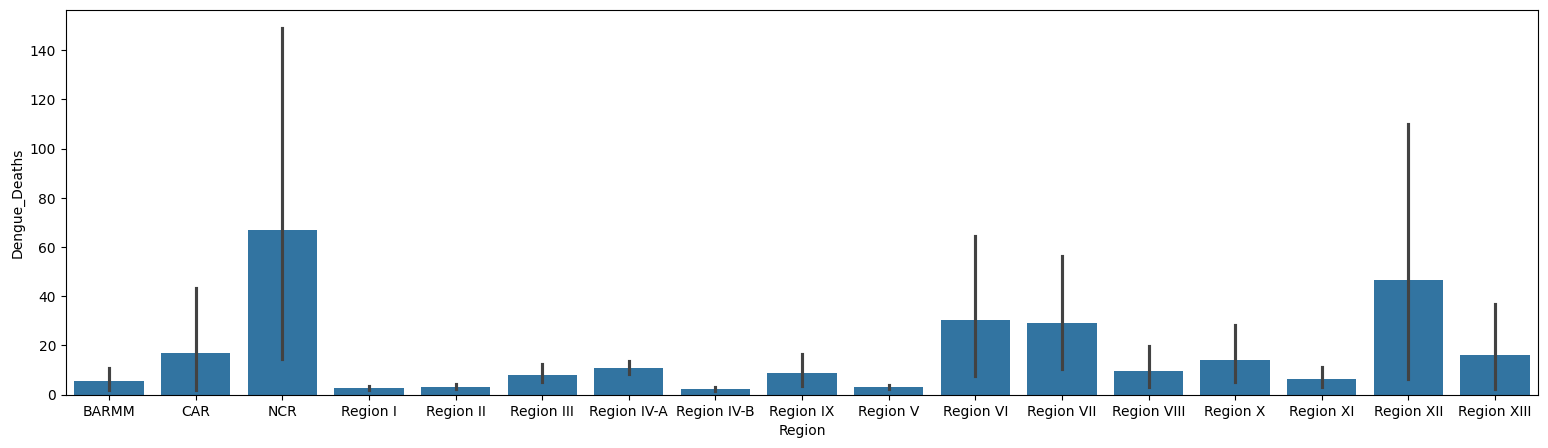

In [7]:
sns.barplot(data = dengue, x ="Region",y="Dengue_Deaths")
plt.gcf().set_size_inches(19,5)
plt.show()

<h1>LINE PLOT</h1>

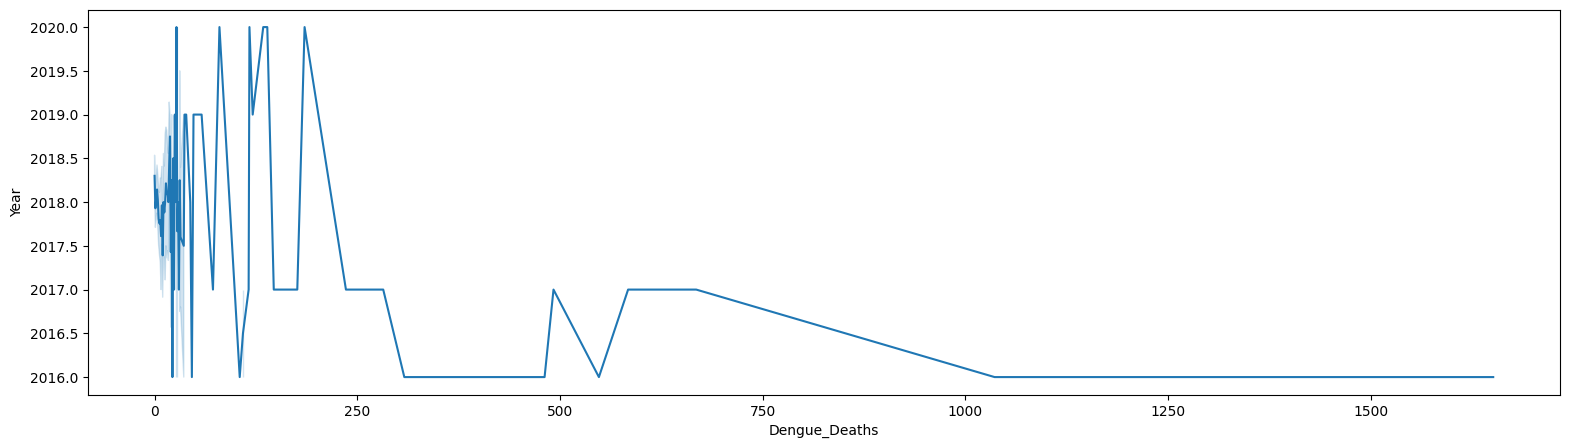

In [8]:
sns.lineplot(data=dengue,x="Dengue_Deaths",y="Year")
plt.gcf().set_size_inches(19,5)
plt.show()

<h1>SCATTER PLOT</h1>

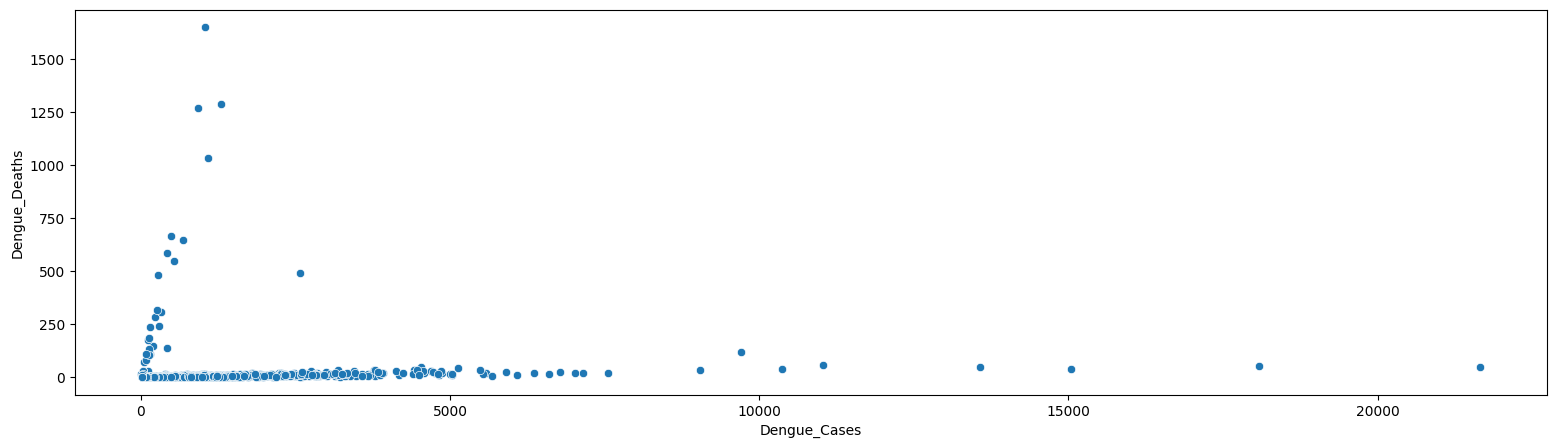

In [9]:
sns.scatterplot(data=dengue,y="Dengue_Deaths",x="Dengue_Cases")
plt.gcf().set_size_inches(19,5)
plt.show()

<h1>BOX PLOT</h1>

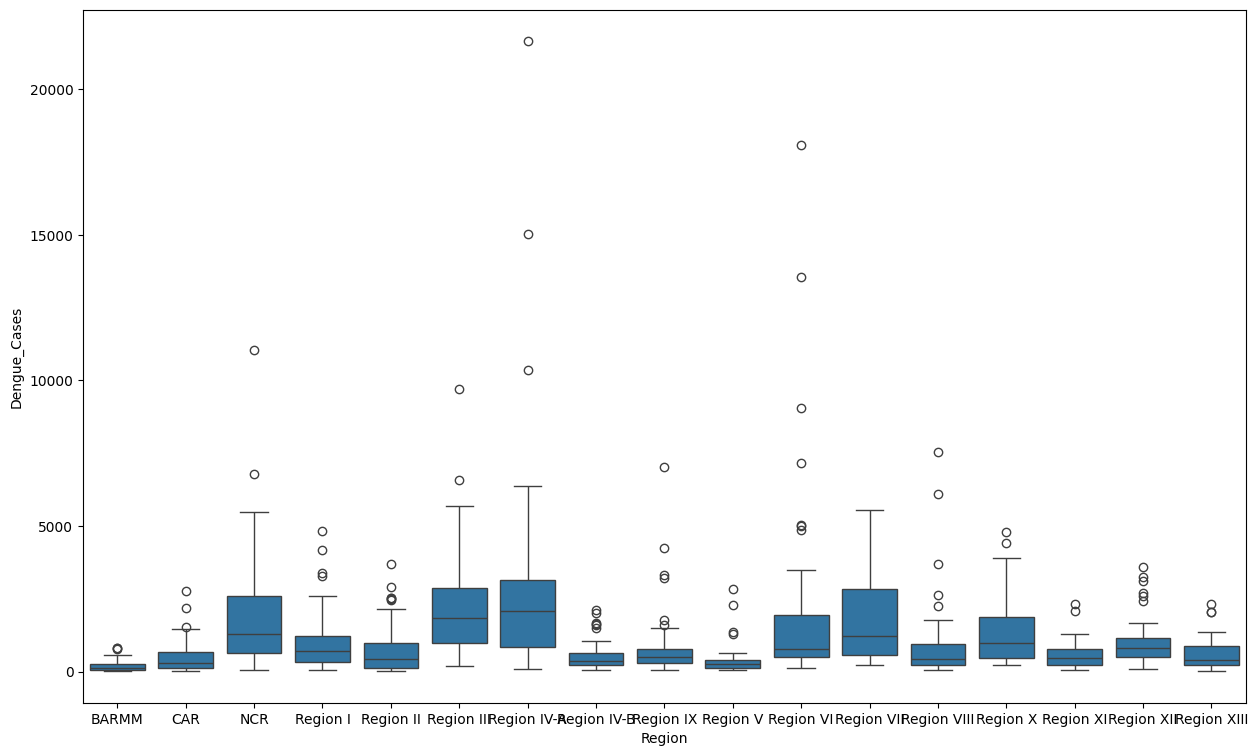

In [10]:
sns.boxplot(data=dengue,x="Region",y="Dengue_Cases")
plt.gcf().set_size_inches(15,9)
plt.show()

<h1>VIOLIN PLOT</h1>

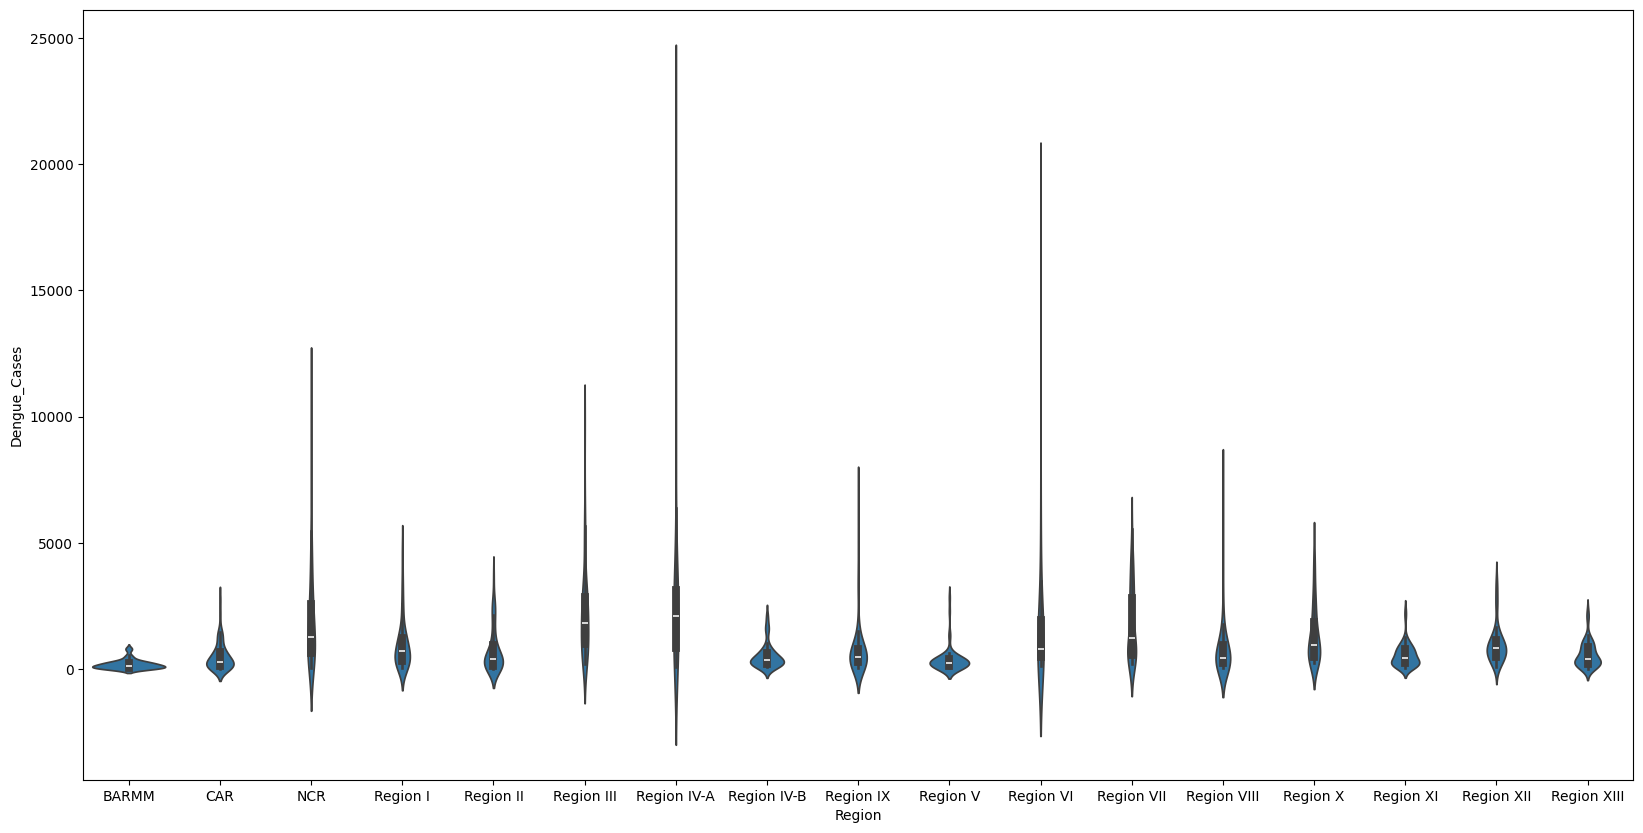

In [11]:
sns.violinplot(data=dengue,x="Region",y="Dengue_Cases")
plt.gcf().set_size_inches(20,10)
plt.show()

In [12]:
dengue_year = dengue[dengue["Year"] != "2019"]
dengue_year

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


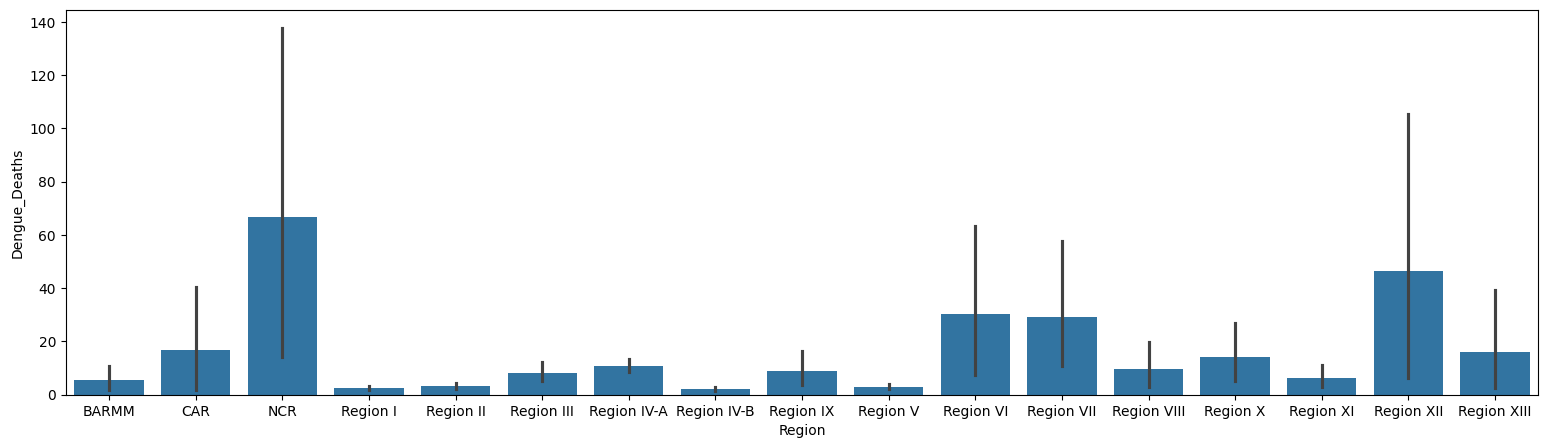

In [13]:
sns.barplot(data = dengue_year, x ="Region",y="Dengue_Deaths")
plt.gcf().set_size_inches(19,5)
plt.show()

<h1>Insignhts 1. Which year recorded the highest number of dengue cases?,</h1>

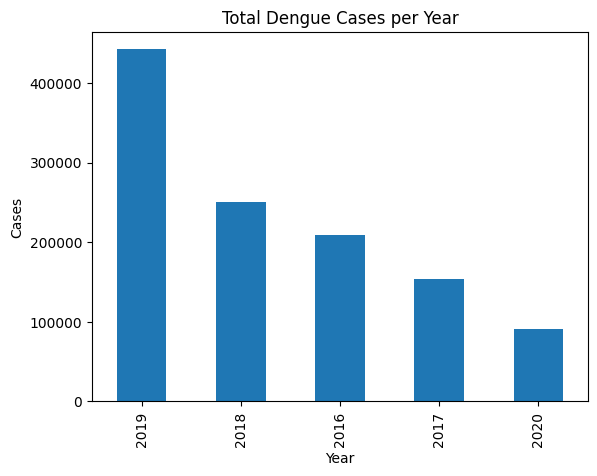

In [14]:
dengue.groupby('Year')['Dengue_Cases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Dengue Cases per Year')
plt.ylabel('Cases')
plt.show()


<h1>Insignths 2. In which year did the highest number of dengue deaths occur?</h1>

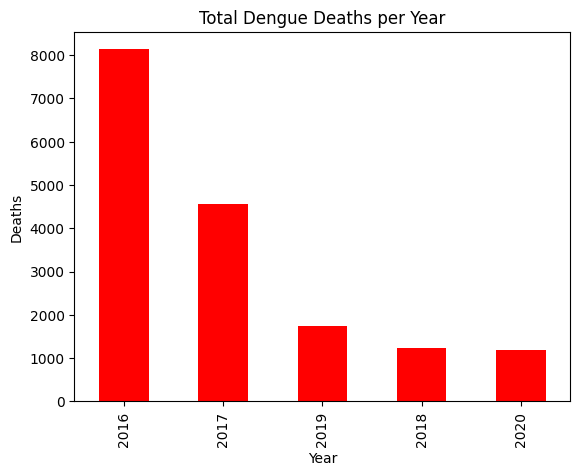

In [16]:
dengue.groupby('Year')['Dengue_Deaths'].sum().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Total Dengue Deaths per Year')
plt.ylabel('Deaths')
plt.show()


<h1>Insignths 3. Which month has the highest average number of dengue cases?</h1>

In [18]:
import calendar

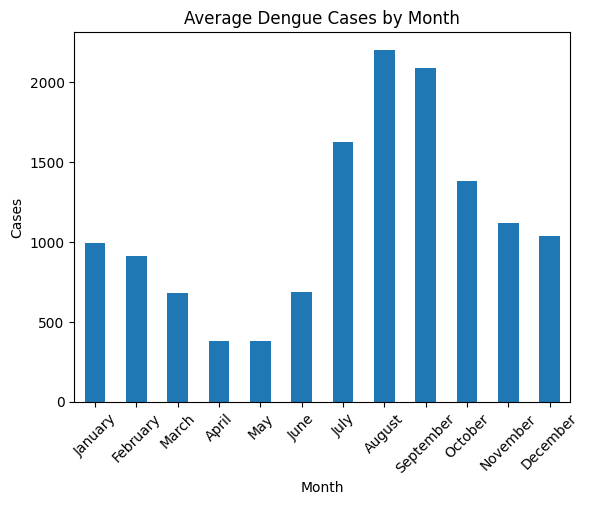

In [19]:
dengue.groupby('Month')['Dengue_Cases'].mean().reindex(calendar.month_name[1:]).plot(kind='bar')
plt.title('Average Dengue Cases by Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()


<h1>Insignths 4. How do dengue cases vary across months and years?</h1>

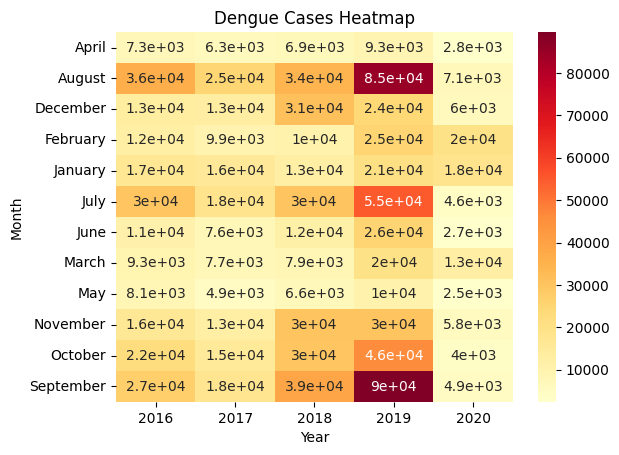

In [20]:
# 4. How do dengue cases vary across months and years?
sns.heatmap(dengue.pivot_table(values='Dengue_Cases', index='Month', columns='Year', aggfunc='sum'), cmap='YlOrRd', annot=True)
plt.title('Dengue Cases Heatmap')
plt.show()


<h1>Insignths 5. Which region has the most dengue cases overall?</h1>

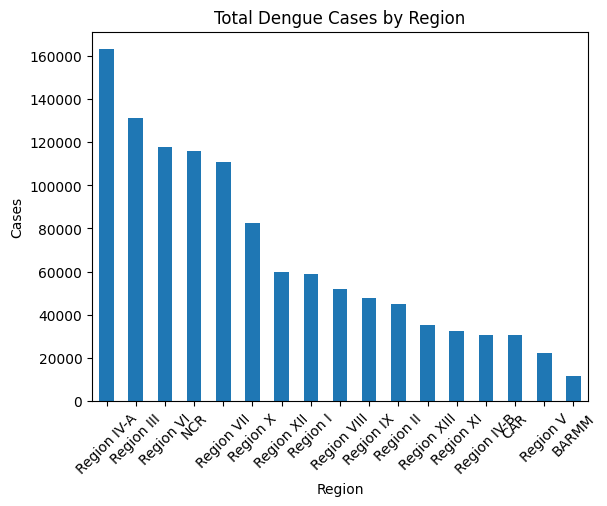

In [21]:
# 5. Which region has the most dengue cases overall?
dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Dengue Cases by Region')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()


<h1>Insignths 6. Which region has the highest dengue deaths?</h1>

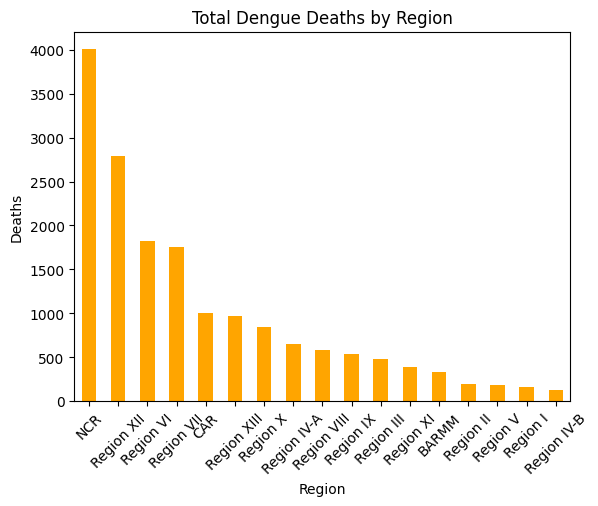

In [22]:
# 6. Which region has the highest dengue deaths?
dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Dengue Deaths by Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()



<h1>Insignths 7. Is there a correlation between dengue cases and deaths?</h1>

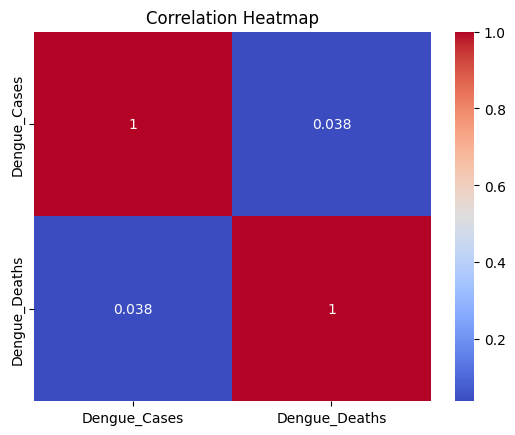

In [23]:
# 7. Is there a correlation between dengue cases and deaths?
sns.heatmap(dengue[['Dengue_Cases', 'Dengue_Deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<h1>Insight 8: How have dengue cases changed across years?</h1>

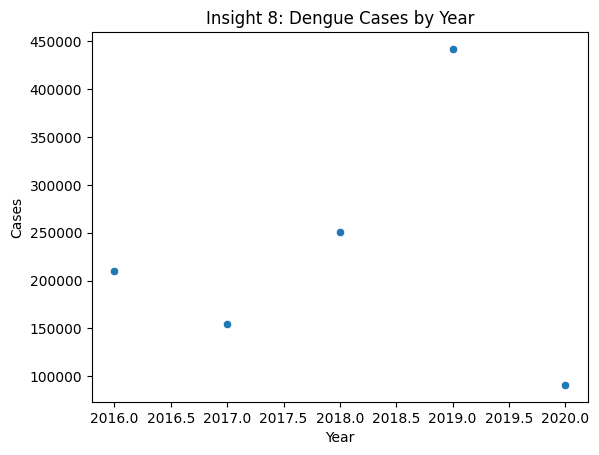

In [26]:
# Insight 8: How have dengue cases changed across years?
sns.scatterplot(data=dengue.groupby('Year')['Dengue_Cases'].sum().reset_index(), x='Year', y='Dengue_Cases')
plt.title('Insight 8: Dengue Cases by Year')
plt.ylabel('Cases')
plt.show()

<h1>Insight 9: What is the trend of dengue deaths across years?</h1>

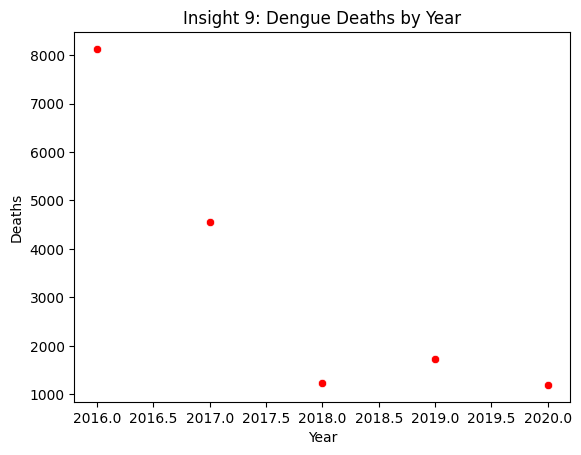

In [27]:
# Insight 9: What is the trend of dengue deaths across years?
sns.scatterplot(data=dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index(), x='Year', y='Dengue_Deaths', color='red')
plt.title('Insight 9: Dengue Deaths by Year')
plt.ylabel('Deaths')
plt.show()

<h1># Insight 10: Which regions show high or low trends in cases?</h1>

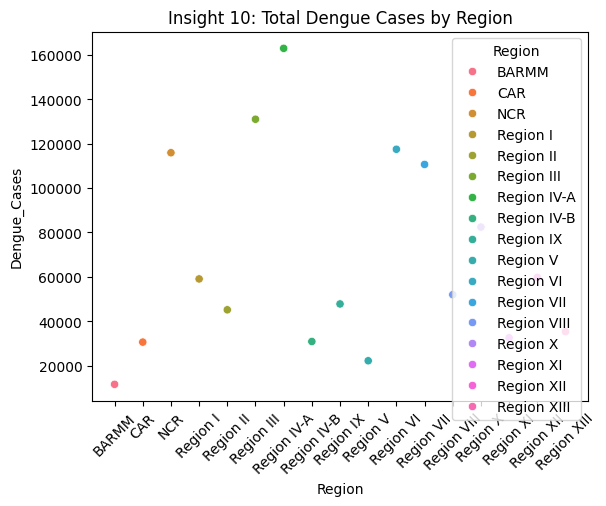

In [28]:
# Insight 10: Which regions show high or low trends in cases?
sns.scatterplot(data=dengue.groupby('Region')['Dengue_Cases'].sum().reset_index(), x='Region', y='Dengue_Cases', hue='Region')
plt.title('Insight 10: Total Dengue Cases by Region')
plt.xticks(rotation=45)
plt.show()

<h1>Insight 11: What is the distribution of dengue cases across regions?</h1>

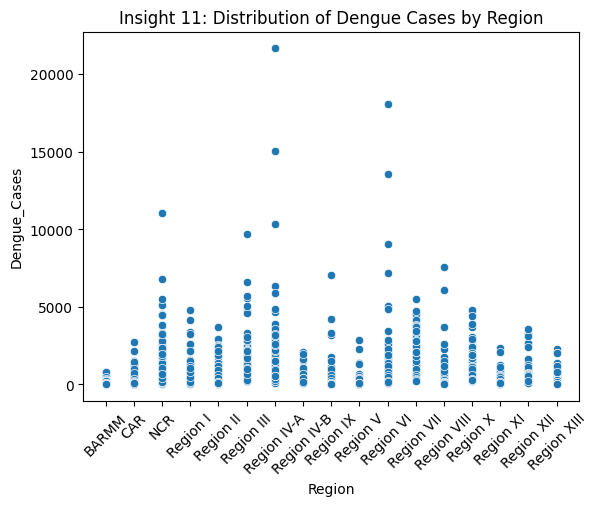

In [34]:
# Insight 11: What is the distribution of dengue cases across regions?
sns.scatterplot(data=dengue, x='Region', y='Dengue_Cases')
plt.title('Insight 11: Distribution of Dengue Cases by Region')
plt.xticks(rotation=45)
plt.show()


<h1>Insignths 12. What is the distribution of dengue deaths across regions?</h1>

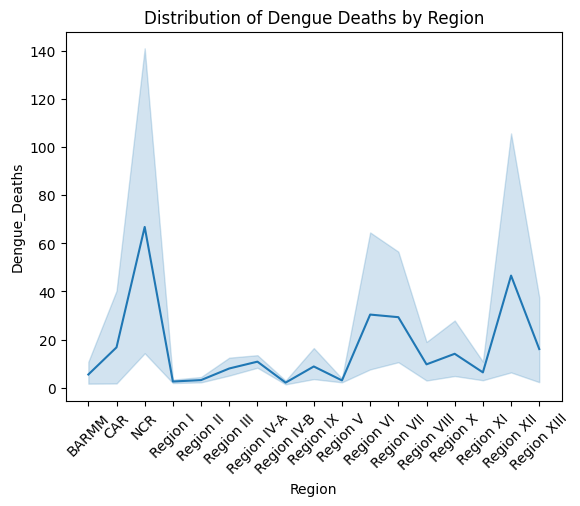

In [36]:
# 12. What is the distribution of dengue deaths across regions?
sns.lineplot(x='Region', y='Dengue_Deaths', data=dengue)
plt.title('Distribution of Dengue Deaths by Region')
plt.xticks(rotation=45)
plt.show()


<h1>Insignths 13. Which are the top 5 months with the highest total dengue cases?</h1>

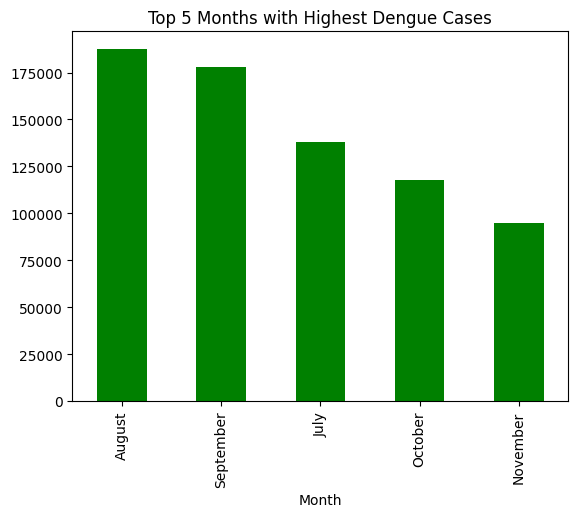

In [37]:

# 13. Which are the top 5 months with the highest total dengue cases?
dengue.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='green')
plt.title('Top 5 Months with Highest Dengue Cases')
plt.show()


<h1>Insignths 14. What are the average cases and deaths per region?</h1>

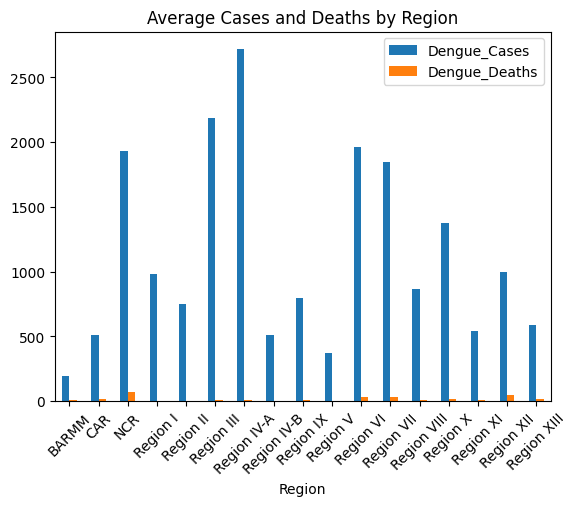

In [38]:
# 14. What are the average cases and deaths per region?
dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean().plot(kind='bar')
plt.title('Average Cases and Deaths by Region')
plt.xticks(rotation=45)
plt.show()


<h1>Insignths 15. What is the relationship between dengue cases and deaths per record?</h1>

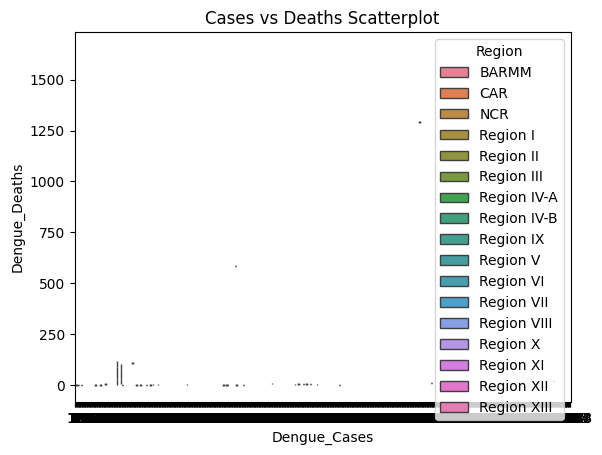

In [42]:
sns.boxplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Region')
plt.title('Cases vs Deaths Scatterplot')
plt.show()


<h1>Insignths 16. Which regions recorded the least dengue deaths?</h1>

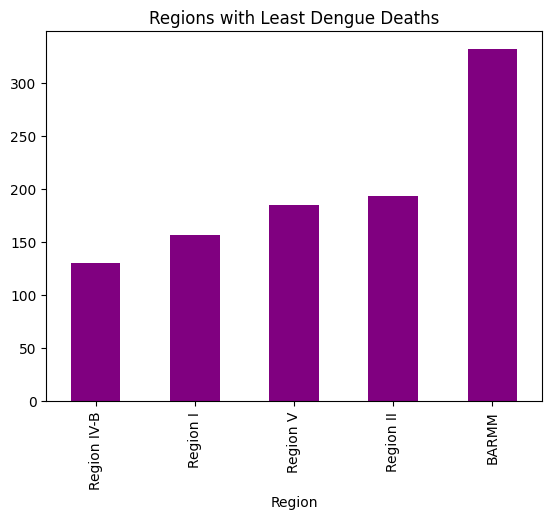

In [43]:
dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values().head(5).plot(kind='bar', color='purple')
plt.title('Regions with Least Dengue Deaths')
plt.show()


<h1>Insignths 17. In which year did dengue deaths peak?</h1>

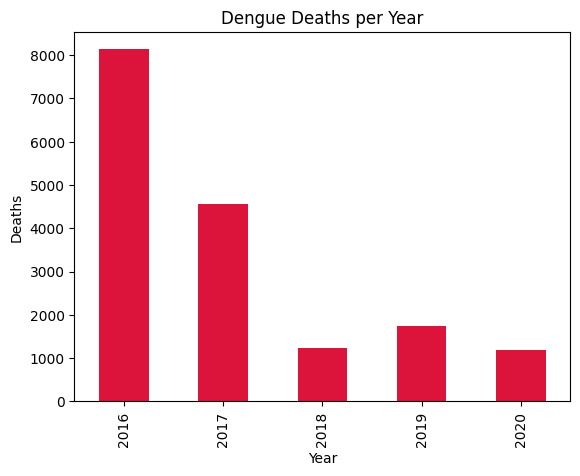

In [58]:
dengue.groupby('Year')['Dengue_Deaths'].sum().plot(kind='bar', color='crimson')
plt.title('Dengue Deaths per Year')
plt.ylabel('Deaths')
plt.show()


<h1>Insight 18: What is the death rate (deaths/cases) by region?</h1>

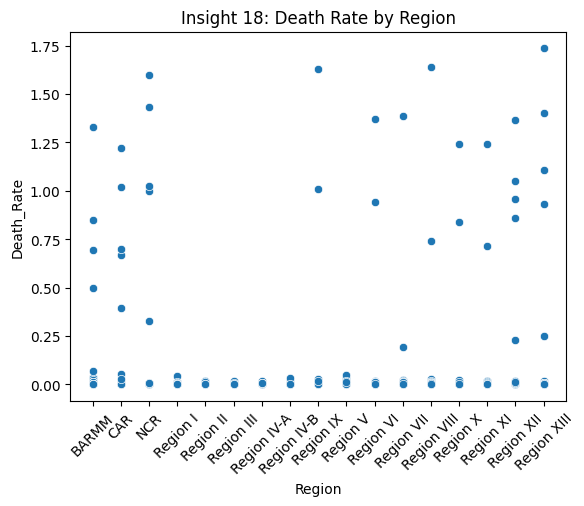

In [57]:
sns.scatterplot(data=dengue, x='Region', y='Death_Rate')
plt.title('Insight 18: Death Rate by Region')
plt.xticks(rotation=45)
plt.show()

In [55]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']

<h1>Insignths 19. What is the monthly average death rate?</h1>

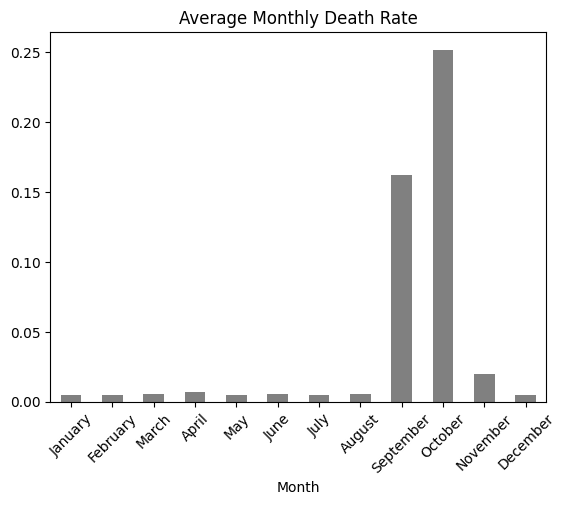

In [56]:
dengue.groupby('Month')['Death_Rate'].mean().reindex(calendar.month_name[1:]).plot(kind='bar', color='gray')
plt.title('Average Monthly Death Rate')
plt.xticks(rotation=45)
plt.show()


<h1>Insignths 20. How do dengue cases vary by region and month?</h1>

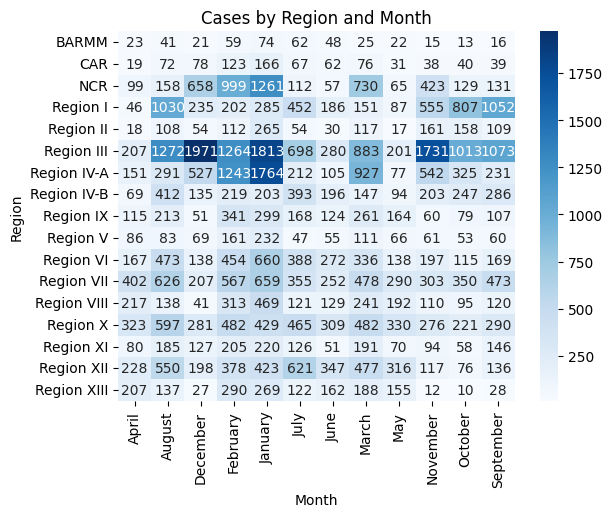

In [53]:

sns.heatmap(dengue.pivot_table(values='Dengue_Cases', index='Region', columns='Month', aggfunc='min'), cmap='Blues',fmt ='.0f', annot=True)
plt.title('Cases by Region and Month')
plt.show()


In [60]:
dengue.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths',
       'Death_Rate'],
      dtype='object')

In [71]:
BARMM = dengue[dengue['Region'] == "BARMM"]
CAR = dengue[dengue['Region'] == "CAR"]
NCR = dengue[dengue['Region'] == "NCR"]
Region_I = dengue[dengue['Region'] == "Region I"]
Region_II = dengue[dengue['Region'] == "Region II"]
Region_III = dengue[dengue['Region'] == "Region III"]
Region_IV_A = dengue[dengue['Region'] == "Region IV-A"]
Region_IV_B = dengue[dengue['Region'] == "Region IV-B"]
Region_V = dengue[dengue['Region'] == "Region V"]
Region_VI = dengue[dengue['Region'] == "Region VI"]
Region_VII = dengue[dengue['Region'] == "Region VII"]
Region_VIII = dengue[dengue['Region'] == "Region VIII"]
Region_IX = dengue[dengue['Region'] == "Region IX"]
Region_X = dengue[dengue['Region'] == "Region X"]
Region_XI = dengue[dengue['Region'] == "Region XI"]
Region_XII = dengue[dengue['Region'] == "Region XII"]
Region_XIII = dengue[dengue['Region'] == "Region XIII"]

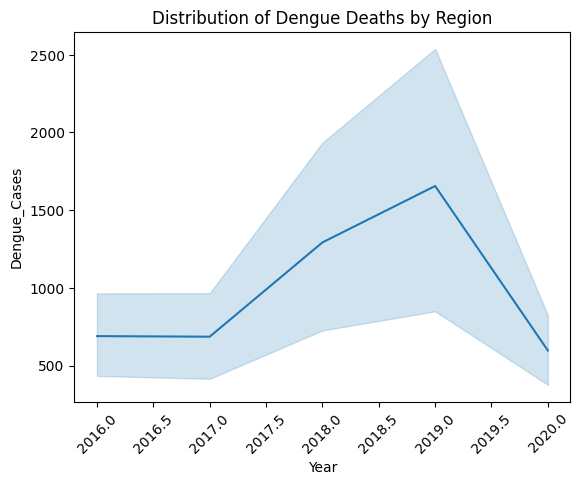

In [74]:
sns.lineplot(x='Year', y='Dengue_Cases', data=Region_I)
plt.title('Distribution of Dengue Deaths by Region')
plt.xticks(rotation=45)
plt.show()
